In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.drop(['education'], inplace = True, axis = 1)

df.rename(columns= {'male' : 'male_gender'}, inplace=True)

df

,male_gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.dropna(axis=0, inplace = True)

df

,male_gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
x = np.asarray(df[['age' , 'male_gender', 'cigsPerDay', 'totChol',  'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

In [6]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)

print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (3000, 6) (3000,)
test set:  (751, 6) (751,)


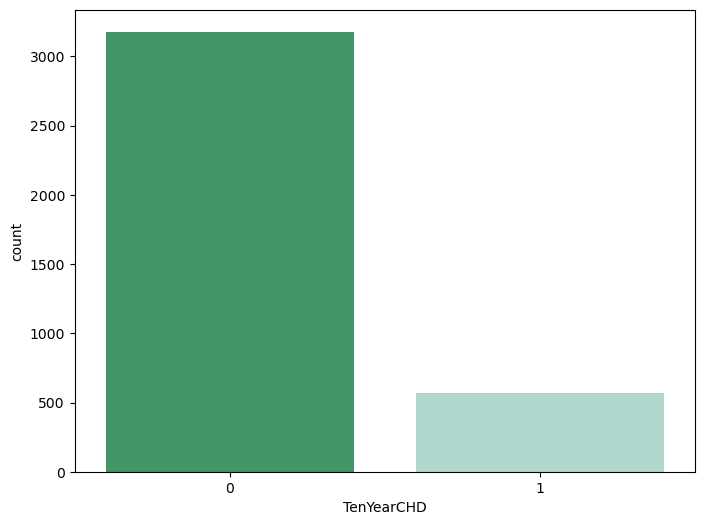

In [9]:
plt.figure(figsize = (8,6))

sns.countplot(x = 'TenYearCHD', data = df, palette = 'BuGn_r')

plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg  = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = logreg.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score 

In [14]:
print('Accuracy of the Model: ', accuracy_score(y_test, y_pred))

Accuracy of the Model:  0.8308921438082557


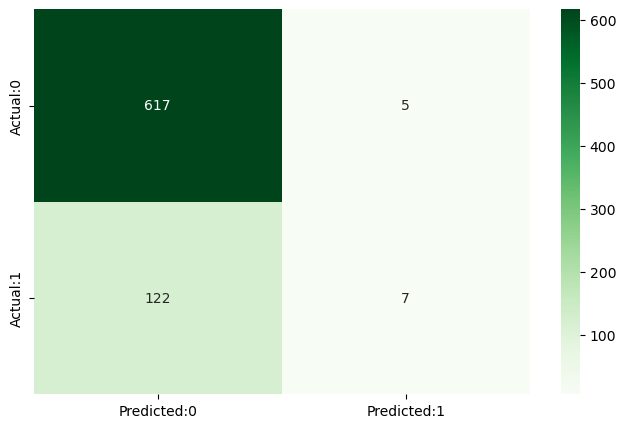

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       622
           1       0.58      0.05      0.10       129

    accuracy                           0.83       751
   macro avg       0.71      0.52      0.50       751
weighted avg       0.79      0.83      0.77       751



In [15]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [16]:
cm

array([[617,   5],
       [122,   7]], dtype=int64)

In [20]:
new_data_point = np.array([[50, 1, 10, 200, 120, 80]])  


scaler = preprocessing.StandardScaler().fit(x)

new_data_point_normalized = scaler.transform(new_data_point)

predicted_outcome = logreg.predict(new_data_point_normalized)

# predicted_outcome

In [21]:
# predicted_outcome[0]

In [22]:
if predicted_outcome[0] == 1:
    print("There is a risk of coronary heart disease within ten years.")
else:
    print("Predicted to not have a risk of coronary heart disease within ten years.")


There is a risk of coronary heart disease within ten years.
